# Support Vector Machine

##### SVM from scratch with gradient descent (without scikit-learn)

# How does an SVM compare to other ML algorithms?
- As a rule of thumb, SVMs are great for relatively small data sets with fewer outliers.
- Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always come up with very robust models.
- The decision of which classifier to use depends on your dataset and the general complexity of the problem.

In [3]:
#Import libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

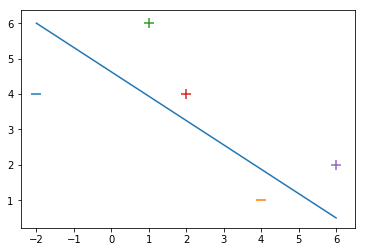

In [8]:
# Step 1 - Create a dataset
# Input Data ([X, Y ,Bias term])
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1]
])

# Associated output labels
y = np.array([-1, -1, 1, 1, 1])

#let's plot in 2D
for d, sample in enumerate(X):
    #Plot the negative samples (the first two)
    if d<2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    #Plot the positive samples (the last three)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
        
# We plot a naive line as hyperplane
plt.plot([-2, 6], [6, 0.5])

## Let's define our loss function (what to minimize) and our objective function (what to optimize)
##### Loss function
We'll use the Hinge loss. This is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs)
![hinge_loss.png](images/hinge_loss.png)
c is the loss function, x the sample, y is the true label, f(x) the predicted label.
![hinge_loss1.png](images/hinge_loss1.png)
##### Objective Function
![Objective_hinge_loss_function.png](images/Objective_hinge_loss_function.png)
As you can see, our objective of a SVM consists of two terms. The first term is a regularizer, the heart of the SVM, the second term the loss. The regularizer balances between margin maximization and loss. We want to find the decision surface that is maximally far away from any data points.

How do we minimize our loss/optimize for our objective (i.e learn)?

We have to derive our objective function to get the gradients! Gradient descent ftw. As we have two terms, we will derive them seperately using the sum rule in differentiation.
![gradient_descent_hinge_function.png](images/gradient_descent_hinge_function.png)
This means, if we have a misclassified sample, we update the weight vector w using the gradients of both terms, else if classified correctly,we just update w by the gradient of the regularizer.

Misclassification condition
![Missclassification_hinge_function.png](images/Missclassification_hinge_function.png)
Update rule for our weights (misclassified)
![w_updatated_misclassification_condition.png](images/w_updatated_misclassification_condition.png)
including the learning rate η and the regularizer λ The learning rate is the length of the steps the algorithm makes down the gradient on the error curve.

- Learning rate too high? The algorithm might overshoot the optimal point.
- Learning rate too low? Could take too long to converge. Or never converge.
The regularizer controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. As a regulizing parameter we choose 1/epochs, so this parameter will decrease, as the number of epochs increases.

- Regularizer too high? overfit (large testing error)
- Regularizer too low? underfit (large training error)
Update rule for our weights (correctly classified)
![w_updated_correctly_classification_condition.png](images/w_updated_correctly_classification_condition.png)

In [17]:
#Let's perform stochastic gradient descent to learn the hyperplane
def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassification so we can plot how they change over time
    errors = []
    
    #training part, gradient descent part
    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i]*Y[i]) + (-2*(1/epoch)*w) )
                error = 1
            else:
                #correct classification, update our wights
                w = w + eta * (-2*(1/epoch)*w)
        errors.append(error)
    
    #Let's plot the rate of classification errors during training
    plt.plot(errors, '|')
    plt.ylim(0.5, 1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Missclassified')
    plt.show()
    
    return w

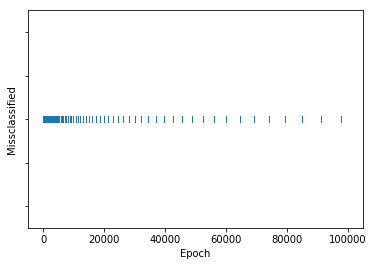

In [18]:
w = svm_sgd_plot(X,y)

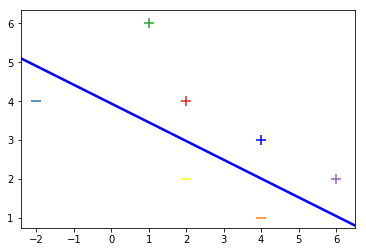

In [19]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')